<a href="https://colab.research.google.com/github/VoKisnaHai1102/DreamDiffusion/blob/main/Assignment%203/240563_KrishnaAg_assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",y_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",y_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 2       1       6       0       6       

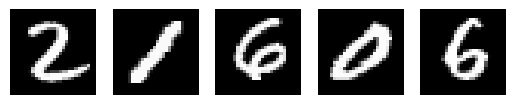

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten=  x_train.reshape(x_train.shape[0], -1)                               # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                      # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

print("x_train shape:", x_train_flatten.shape)
print("y_train shape:", y_train.shape)
print("x_validation shape:", x_validation.shape)
print("y_validation shape:", y_validation.shape)

x_train shape: (50000, 784)
y_train shape: (50000,)
x_validation shape: (10000, 784)
y_validation shape: (10000,)


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

n_epochs = 30            # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(
    x_train_flatten, y_train,              # training data
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation)
)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5860 - loss: 21.7541 - val_accuracy: 0.8597 - val_loss: 1.7442
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8774 - loss: 1.3070 - val_accuracy: 0.8883 - val_loss: 1.0728
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9069 - loss: 0.7555 - val_accuracy: 0.9020 - val_loss: 0.8301
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9250 - loss: 0.4992 - val_accuracy: 0.9127 - val_loss: 0.6574
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9373 - loss: 0.3756 - val_accuracy: 0.9194 - val_loss: 0.6001
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9473 - loss: 0.2780 - val_accuracy: 0.9232 - val_loss: 0.5454
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9541 - loss: 0.2281 - val_accuracy: 0.9285 - val_loss: 0.5039
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9613 - loss: 0.1744 - val_accuracy: 0.9310 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.4490
Loss =  0.39245015382766724
Accuracy =  95.55000066757202 %


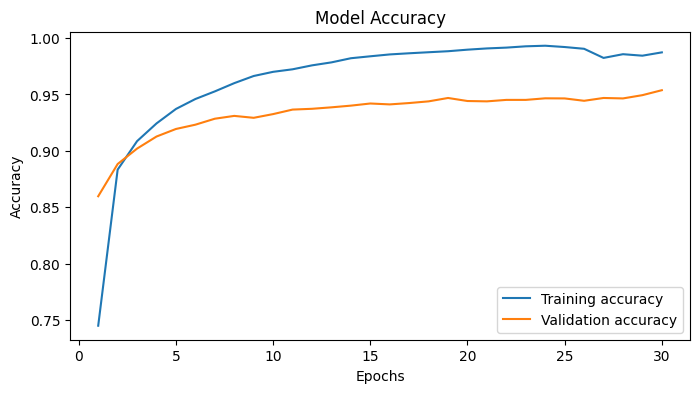

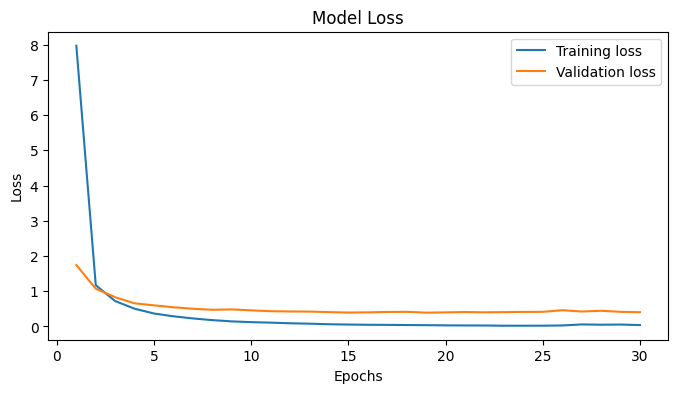

In [ ]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(epochs, train_acc, label="Training accuracy")
plt.plot(epochs, val_acc,   label="Validation accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.figure(figsize=(8,4))
plt.plot(epochs, train_loss, label="Training loss")
plt.plot(epochs, val_loss,   label="Validation loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

label: 
6       7       7       7       7       

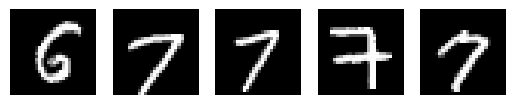

Predicted value: 
6      7      7      7      7      

In [ ]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(len(x_test_flatten), 5, replace = False)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test_flatten[ind].reshape(28, 28), cmap = 'gray')             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i, ind in enumerate(index):
    # Add verbose=0 to suppress output during prediction
    probs = model.predict(x_test_flatten[ind].reshape(1, 784), verbose = 0)
    digit = np.argmax(probs)
    print(digit, end="      ")